In [1]:
import subprocess
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [2]:
res = subprocess.check_output(["curl", "http://127.0.0.1:5000/word2vec/similarity?w1=sex&w2=sex"])

In [3]:
#human similarity from 
human_sim = pd.read_csv('combined.csv', header=0)

In [4]:
w1 = human_sim['Word 1'].values
w2 = human_sim['Word 2'].values
true_sim = human_sim['Human (mean)'].values

In [5]:
word_sim = []
for i in range(353):
    k1, k2 = w1[i], w2[i]
    res = subprocess.check_output(["curl", "http://127.0.0.1:5000/word2vec/similarity?w1=" +  k1 + "&w2=" + k2])
    word_sim.append(float(res))

In [6]:
word_sim_arr = np.array(word_sim)

In [7]:
print(word_sim_arr)

[ 0.26393773  0.51729619  1.          0.36346261  0.39639163  0.40686231
  0.37796983  0.3402561   0.33218451  0.61149707  0.38991608  0.24085768
  0.64172602  0.56785624  0.6319523   0.21336083  0.42066182  0.06630216
  0.47047193  0.34156865  0.4680556   0.12326755  0.06611791  0.0360669
  0.10417767  0.25652347  0.04447177  0.07456468  0.32453122  0.26132065
  0.41751628  0.61512207  0.05661814  0.1181317   0.65109568  0.20875592
  0.42778127  0.66387474  0.6342512   0.10070593  0.22339174  0.28883829
  0.73135483  0.66824679  0.50511787  0.39200801  0.31498639  0.32154805
  0.24712519  0.34465769  0.26419907  0.44535527  0.17430326  0.47419042
  0.36640595  0.43719831  0.08025177  0.08876198  0.59717485  0.68814924
  0.2456354   0.09346937  0.17304002  0.50702004  0.58397701  0.15679939
  0.58383676  0.62108106  0.68308526  0.58861594  0.50836674  0.2525393
  0.48634962  0.55274065  0.60839107  0.3740926   0.36290242  0.30286191
  0.21234227  0.2232002   0.02318616  0.35959249  0.0

In [8]:
scaled_sim = 10*(word_sim_arr - np.min(word_sim_arr) )/(np.max(word_sim_arr) - np.min(word_sim_arr))

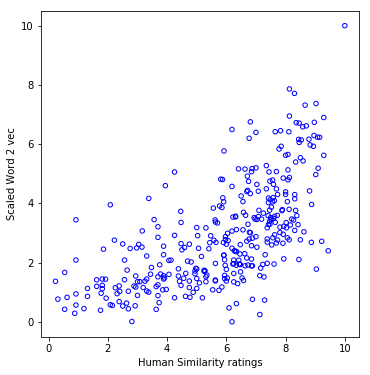

In [9]:
plt.rcParams['figure.figsize'] = [6,6]
plt.scatter(true_sim, scaled_sim, facecolors='none', s = 20, edgecolors='b')
plt.xlabel("Human Similarity ratings")
plt.ylabel("Scaled Word 2 vec")
plt.gca().set_aspect('equal', adjustable='box')
plt.savefig('word2vec.jpg')